# LA-ICP-MS analysis of polymer standards

In [1]:
import copy, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

## Import data

In [3]:
data_stnd = (pd.read_csv('df/Data_Polymer_Standards.csv', sep = ',')).pivot_table(index=['Day', 'Polymer', 'Time', 'Batch', 'N'])
data_stnd

Al27           As75         Ba138  \
Day    Polymer Time   Batch N                                              
230523 PE      After  1     1  5.370841e+06  299206.823799  2.689764e+07   
                            2  4.800720e+06  252326.401135  2.506731e+07   
                            3  4.992677e+06  243115.649770  2.733078e+07   
               Before 1     1  5.329571e+06  287435.181446  2.757962e+07   
                            2  5.253660e+06  279034.407450  2.917520e+07   
...                                     ...            ...           ...   
230705 PVC     Before 2     2  5.136992e+06  914197.546498  1.925867e+07   
                            3  4.359090e+06  783508.365736  1.707040e+07   
                      3     1  4.563495e+06  739282.542042  1.531131e+07   
                            2  3.932444e+06  686567.314033  1.450292e+07   
                            3  3.520949e+06  582364.503351  1.255337e+07   

                                        C13           Ca44          Co59  \
Day    Polymer Time   Batch N                                              
230523 PE      After  1     1  1.193325e+06  861939.825528  1.194349e+06   
                            2  1.069893e+06  768308.589142  9.836393e+05   
                            3  1.116920e+06  825509.666866  1.072593e+06   
               Before 1     1  1.306882e+06  788628.636745  1.072296e+06   
                            2  1.270569e+06  871613.768272  1.101877e+06   
...                                     ...            ...           ...   
230705 PVC     Before 2     2  5.056930e+05  504948.100128  2.929164e+05   
                            3  4.983937e+05  440209.885875  2.583406e+05   
                      3     1  4.576424e+05  418974.482106  2.531547e+05   
                            2  4.151308e+05  383696.335158  2.344380e+05   
                            3  3.922029e+05  334373.188615  2.049047e+05   

                                       Cr50          Cu63          Fe57  \
Day    Polymer Time   Batch N                                             
230523 PE      After  1     1  1.974306e+06  1.321303e+06  61511.005336   
                            2  1.764372e+06  1.131811e+06  54416.119762   
                            3  1.792943e+06  1.186399e+06  51507.478540   
               Before 1     1  1.934673e+06  1.291406e+06  59860.121096   
                            2  2.059184e+06  1.198994e+06  58457.590707   
...                                     ...           ...           ...   
230705 PVC     Before 2     2  1.608084e+06  6.488410e+06  85777.387100   
                            3  1.360912e+06  5.828653e+06  73233.125399   
                      3     1  1.004646e+06  5.139141e+06  71448.097369   
                            2  9.096543e+05  4.746956e+06  67327.638388   
                            3  8.324337e+05  4.202226e+06  57585.551657   

                                       Ga69           K39           Mg25  \
Day    Polymer Time   Batch N                                              
230523 PE      After  1     1  2.585262e+06  2.044070e+06  284120.716685   
                            2  2.354250e+06  2.164780e+06  255473.223963   
                            3  2.296814e+06  2.398341e+06  258948.306700   
               Before 1     1  2.482147e+06  2.049570e+06  276279.640225   
                            2  2.540375e+06  1.987166e+06  296541.108833   
...                                     ...           ...            ...   
230705 PVC     Before 2     2  1.579894e+06  3.276626e+06  180512.986440   
                            3  1.341686e+06  2.942446e+06  165836.169974   
                      3     1  1.275367e+06  2.727743e+06  157731.975428   
                            2  1.170766e+06  2.475138e+06  148230.337438   
                            3  9.832074e+05  2.125326e+06  129895.492543   

                                       Mn55          Na23          Nb93  \
Day    Polymer Time  

## Statistics

### No element correction

To evaluate the homogeneity, reproducibility and drift, the following relative standard deviations are calculated:
* RSD within batch
* RSD between batches
* RSD over time (before and after samples)

This will be performed with and without correction for one element as internal standard. Optional also correction for total response will be applied.

#### RSD within batch

In [4]:
data_stnd_mean = data_stnd.groupby(['Polymer', 'Day', 'Time','Batch']).agg('mean')

In [5]:
data_stnd_stdv = data_stnd.groupby(['Polymer', 'Day', 'Time','Batch']).agg('std')

In [6]:
data_stnd_rsd = data_stnd_stdv/data_stnd_mean*100
data_stnd_rsd.round(1)

Al27  As75  Ba138    C13  Ca44  Co59  Cr50  Cu63  \
Polymer Day    Time   Batch                                                     
Glass   230531 Before 1       1.3   1.1    3.1    1.2   0.9   1.6   3.3   2.6   
        230601 Before 1       2.2   6.2    2.2    5.9   2.6   3.5   5.3   3.9   
        230605 Before 1       2.6   3.1    2.2    4.8   4.2   2.4   3.1   2.1   
        230606 Before 1      52.7  54.0   55.6  173.2  52.3  57.5  37.9  49.4   
        230607 Before 1      10.5  10.8   12.9    8.8  12.4  12.9  10.7  11.3   
...                           ...   ...    ...    ...   ...   ...   ...   ...   
PVC     230627 Before 3      36.7   3.3    2.4    6.6   2.1   1.0   3.5   1.5   
        230705 After  1      16.0  15.8   11.0    9.2  11.6  15.6  18.2  13.8   
               Before 1       4.0   1.2    0.1    3.7   1.2   0.5   1.5   1.9   
                      2      23.2  10.4    6.6    5.0   9.3   8.4   9.0   7.2   
                      3      13.1  11.9   10.0    7.9  11.2  10.5   9.4  10.0   

                             Fe57  Ga69   K39  Mg25  Mn55  Na23  Nb93  Ni60  \
Polymer Day    Time   Batch                                                   
Glass   230531 Before 1       3.2   1.9   1.2   3.7   3.6   0.8   2.8   2.9   
        230601 Before 1       3.1   3.6   2.8   2.1   6.6   1.1   4.2   3.7   
        230605 Before 1       2.4   3.0   2.9   1.2   4.2   4.2   2.7   3.5   
        230606 Before 1      53.7  55.3  38.5  44.2  54.6  53.8  52.4  55.6   
        230607 Before 1      12.0  11.3  11.4   8.5  14.5  11.6  14.1  14.0   
...                           ...   ...   ...   ...   ...   ...   ...   ...   
PVC     230627 Before 3       2.3   6.5   2.6   2.9   2.6   4.2   6.8   1.9   
        230705 After  1      14.2  20.6  11.7  15.0  14.6   8.6  12.2  15.2   
               Before 1       1.2   3.3   2.3   2.2   4.1   1.9   1.4   0.2   
                      2       9.6  13.7   6.9   6.3   7.0   3.7   7.6   9.5   
                      3      10.9  12.9  12.4   9.7  11.3  10.4  11.0  10.8   

                             Pb208  Pd106  Sb121  Si29  Sn118  Sr88  Ti47  
Polymer Day    Time   Batch                                                
Glass   230531 Before 1        0.5    1.4    0.9   0.9    1.5   0.9   1.7  
        230601 Before 1        1.1    4.2    2.0   4.2    1.2   2.6   3.9  
        230605 Before 1        3.4    2.6   15.5   3.2    4.4   3.9   2.1  
        230606 Before 1       54.0   55.6   53.7  58.6   55.0  54.6  37.5  
        230607 Before 1       10.9   10.9   12.2  11.5   11.8  13.2  12.3  
...                            ...    ...    ...   ...    ...   ...   ...  
PVC     230627 Before 3        2.3    4.6    6.4   5.4    2.4   1.6   4.1  
        230705 After  1       11.1   13.0   18.7  13.1   19.2  12.8  21.2  
               Before 1        1.6    1.0    3.0   2.5    0.7   2.0   1.0  
                      2        5.9    2.3    6.9   1.9    9.6   8.0   9.2  
                      3        9.3    9.3   13.6   8.5   12.6   9.4   7.5  

[218 rows x 23 columns]

##### Glass

In [7]:
data_stnd_rsd_glass = data_stnd_rsd.xs(level="Polymer", key="Glass")
data_stnd_rsd_glass

,,,Al27,As75,Ba138,C13,Ca44,Co59,Cr50,Cu63,Fe57,Ga69,K39,Mg25,Mn55,Na23,Nb93,Ni60,Pb208,Pd106,Sb121,Si29,Sn118,Sr88,Ti47
Day,Time,Batch,,,,,,,,,,,,,,,,,,,,,,,
230531,Before,1,1.278533,1.119328,3.072711,1.221939,0.889743,1.639369,3.301166,2.623924,3.226396,1.892739,1.210811,3.679039,3.577549,0.840216,2.781107,2.934633,0.472691,1.360331,0.878465,0.947288,1.503811,0.869747,1.677219
230601,Before,1,2.156965,6.240769,2.240338,5.859778,2.619638,3.517285,5.262001,3.867447,3.054494,3.559892,2.807894,2.072630,6.586684,1.083552,4.228335,3.713217,1.076935,4.188852,1.986988,4.152865,1.171058,2.592114,3.928909
230605,Before,1,2.596622,3.082852,2.215324,4.781521,4.159392,2.378697,3.082417,2.062707,2.378343,3.044474,2.884929,1.209703,4.212327,4.178308,2.669948,3.498977,3.433017,2.635497,15.529218,3.150931,4.409552,3.936269,2.144557
230606,Before,1,52.721619,54.010354,55.599499,173.205081,52.331582,57.539423,37.949447,49.427517,53.737571,55.300358,38.528250,44.183690,54.552037,53.791744,52.380099,55.556766,53.976661,55.614300,53.723307,58.609618,54.978787,54.580126,37.547924
230607,Before,1,10.490296,10.803886,12.875268,8.805499,12.350807,12.920153,10.653065,11.254214,11.968435,11.326405,11.391593,8.479936,14.453043,11.551670,14.066192,14.014097,10.927492,10.943262,12.238244,11.522260,11.818522,13.228279,12.265902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230621,Before,1,7.329177,8.284916,9.666764,17.630193,7.944856,9.806612,5.083307,10.182885,17.072992,9.412965,21.690384,8.389412,9.811527,8.065954,9.156029,8.459232,7.665418,8.507192,7.250055,7.132503,8.505626,7.226453,9.571135
230622,Before,1,2.585371,5.074377,1.589418,7.803337,2.379025,5.021395,2.368035,4.494814,3.326452,3.137705,8.684274,3.613336,2.915445,2.174614,5.231960,2.814801,2.646724,8.334433,2.470425,1.128600,2.272150,2.552629,4.736820
230623,Before,1,3.668865,4.779518,5.104231,5.929949,3.904757,3.854336,4.295738,1.395655,5.961574,4.533267,10.297697,5.224843,5.460146,4.279605,3.594893,5.184987,4.378528,6.707326,4.867275,4.848710,3.436520,5.302729,5.417023


In [8]:
#data_stnd_rsd_glass.mean()

In [9]:
data_stnd_rsd_glass.mean().mean()

9.177514049145675

##### PVC

In [10]:
data_stnd_rsd_pvc = data_stnd_rsd.xs(level="Polymer", key="PVC")
data_stnd_rsd_pvc.round(1)

Al27  As75  Ba138   C13  Ca44  Co59  Cr50  Cu63  Fe57  \
Day    Time   Batch                                                          
230523 After  1       5.6   5.2   10.1   4.7   5.1   4.1   3.5   6.6   3.8   
       Before 1       7.5   3.3    1.9  40.8   2.4   1.4   4.7   2.4   3.8   
              2      17.1   7.4    4.8  14.0   7.9   6.6   6.1  10.1   7.0   
              3      12.0   8.5    4.7   7.8   6.1   8.3   6.5   9.3   9.3   
230524 After  1       6.0   4.5    3.3  20.8   3.1   6.4   3.8   8.0   6.6   
...                   ...   ...    ...   ...   ...   ...   ...   ...   ...   
230627 Before 3      36.7   3.3    2.4   6.6   2.1   1.0   3.5   1.5   2.3   
230705 After  1      16.0  15.8   11.0   9.2  11.6  15.6  18.2  13.8  14.2   
       Before 1       4.0   1.2    0.1   3.7   1.2   0.5   1.5   1.9   1.2   
              2      23.2  10.4    6.6   5.0   9.3   8.4   9.0   7.2   9.6   
              3      13.1  11.9   10.0   7.9  11.2  10.5   9.4  10.0  10.9   

                     Ga69   K39  Mg25  Mn55  Na23  Nb93  Ni60  Pb208  Pd106  \
Day    Time   Batch                                                           
230523 After  1       5.1   5.5   5.9   8.7   7.1   9.5   5.0    9.0    3.2   
       Before 1       2.5   4.0   4.9  16.3   1.7   6.9   5.5    3.9    4.1   
              2      10.0   5.7   7.3   6.4   6.7   7.5   8.8    3.8    6.5   
              3       9.3   6.1   5.3   6.6  10.6   7.6   9.0    4.4    8.1   
230524 After  1       5.9  51.2   4.2   5.2   0.9   6.9   5.5    6.3    7.4   
...                   ...   ...   ...   ...   ...   ...   ...    ...    ...   
230627 Before 3       6.5   2.6   2.9   2.6   4.2   6.8   1.9    2.3    4.6   
230705 After  1      20.6  11.7  15.0  14.6   8.6  12.2  15.2   11.1   13.0   
       Before 1       3.3   2.3   2.2   4.1   1.9   1.4   0.2    1.6    1.0   
              2      13.7   6.9   6.3   7.0   3.7   7.6   9.5    5.9    2.3   
              3      12.9  12.4   9.7  11.3  10.4  11.0  10.8    9.3    9.3   

                     Sb121  Si29  Sn118  Sr88  Ti47  
Day    Time   Batch                                  
230523 After  1        2.7  12.6    6.7   5.5   3.5  
       Before 1        4.0  31.2    3.2   7.1   6.3  
              2       10.0  11.7    6.3   6.1   6.3  
              3       13.2  12.0    6.7   5.6   6.7  
230524 After  1       14.7  20.1    4.7   3.9   3.0  
...                    ...   ...    ...   ...   ...  
230627 Before 3        6.4   5.4    2.4   1.6   4.1  
230705 After  1       18.7  13.1   19.2  12.8  21.2  
       Before 1        3.0   2.5    0.7   2.0   1.0  
              2        6.9   1.9    9.6   8.0   9.2  
              3       13.6   8.5   12.6   9.4   7.5  

[69 rows x 23 columns]

In [11]:
data_stnd_rsd_pvc.mean()

Al27     16.698173
As75      8.440531
Ba138     7.574929
C13       5.804236
Ca44      7.037815
           ...    
Sb121     8.304747
Si29      7.427673
Sn118     9.032395
Sr88      7.475011
Ti47      8.276824
Length: 23, dtype: float64

In [12]:
data_stnd_rsd_pvc.mean().mean()

8.24943919094565

##### PE

In [13]:
data_stnd_rsd_pe = data_stnd_rsd.xs(level="Polymer", key="PE")
data_stnd_rsd_pe.round(1)

Al27  As75  Ba138  C13  Ca44  Co59  Cr50  Cu63  Fe57  \
Day    Time   Batch                                                         
230523 After  1       5.7  11.4    4.5  5.5   5.8   9.8   6.2   8.0   9.2   
       Before 1       5.3  13.3    9.0  4.8   8.1   4.5   9.1   6.1   8.4   
              2       5.2   6.5    5.7  2.3  14.7   6.1   4.1   5.6   4.4   
              3       7.3   8.3    7.1  9.6   8.2   9.4   7.1   8.9   8.9   
230524 After  1       2.2  12.2    7.9  7.5   8.5   1.6   1.1   5.9   5.2   
...                   ...   ...    ...  ...   ...   ...   ...   ...   ...   
230627 Before 2       1.7   3.4    6.5  3.2   5.5   3.4   1.2   4.2   4.2   
              3       2.2   2.6    3.3  1.1   0.2   7.1   3.1   5.1   3.0   
230705 Before 1      18.2   8.4    3.6  1.4   1.1   6.9   0.7   3.1   6.0   
              2       2.5   1.0    2.6  6.5  11.7   5.1   5.2   5.6   3.0   
              3       4.6   5.7   12.2  0.9  11.1   6.9   5.0   6.9   5.1   

                     Ga69   K39  Mg25  Mn55  Na23  Nb93  Ni60  Pb208  Pd106  \
Day    Time   Batch                                                           
230523 After  1       6.3   8.2   5.9   3.7  23.5   5.5   7.7    3.8    3.7   
       Before 1       7.9  12.2  10.3   7.5  18.9   9.7   6.7   10.3    8.4   
              2       6.1  18.3   2.8   6.6  13.2   4.9   7.8    6.6    5.4   
              3       9.4  20.8   6.2  14.0  11.5   7.4  14.0    9.0    7.9   
230524 After  1       2.4  20.0   2.2   6.0  25.9   1.9   5.0    0.8    3.1   
...                   ...   ...   ...   ...   ...   ...   ...    ...    ...   
230627 Before 2       2.3   9.1   3.5   1.3   6.9   3.1   4.6    4.8    3.6   
              3       2.8   2.9   5.7   3.6  10.5   3.2   4.5    2.7    3.6   
230705 Before 1       2.1   3.3   6.2   4.9  11.3   4.8   2.3    4.7   16.5   
              2       3.0  18.7   7.8   8.9   8.0   5.5   9.5    8.5    3.0   
              3       4.3  12.6   4.0  10.8  10.3   7.7  11.1   12.3    0.6   

                     Sb121  Si29  Sn118  Sr88  Ti47  
Day    Time   Batch                                  
230523 After  1        4.2   4.4   11.7   4.6   2.7  
       Before 1       10.0   9.2   13.8   7.9   8.8  
              2        6.1   7.3    5.8   5.4   4.2  
              3        8.6   6.1    8.4   7.9   7.7  
230524 After  1        1.1   5.1   13.4   2.8   3.1  
...                    ...   ...    ...   ...   ...  
230627 Before 2        2.4   3.2    4.8   2.0   2.7  
              3        3.2   5.4    5.2   2.5   2.4  
230705 Before 1        1.4   1.2   10.6   3.1   3.9  
              2        4.4   8.2    2.0  10.0   3.6  
              3        4.5   7.8    4.8  11.0   9.5  

[68 rows x 23 columns]

In [14]:
data_stnd_rsd_pe.mean()

Al27     10.038729
As75     10.770701
Ba138     8.174877
C13       4.828425
Ca44     10.479742
           ...    
Sb121     8.153976
Si29     10.071402
Sn118    10.538160
Sr88      8.763604
Ti47      7.832548
Length: 23, dtype: float64

In [15]:
data_stnd_rsd_pe.mean().mean()

9.719887607503289

##### PS

In [16]:
data_stnd_rsd_ps = data_stnd_rsd.xs(level="Polymer", key="PS")
data_stnd_rsd_ps.round(1)

Al27  As75  Ba138   C13  Ca44  Co59  Cr50  Cu63  Fe57  \
Day    Time   Batch                                                          
230523 After  1      23.3  42.2   49.9   3.5  37.8  34.3  40.4  28.6  34.6   
       Before 1      40.4  30.8   66.3   3.4  27.0  24.3  33.5  22.3  28.6   
              2      28.0  24.7   54.7   6.7  24.7  23.0  24.9  25.6  24.7   
              3      36.7  29.9   48.3   2.5  34.9  30.9  30.6  27.1  30.2   
230524 After  1      44.1  44.4   73.1   1.7  43.9  44.3  46.7  36.9  42.5   
...                   ...   ...    ...   ...   ...   ...   ...   ...   ...   
230627 Before 2      13.4  14.4   20.6   6.0   9.9   9.7  13.9   9.6  10.6   
              3      42.8  41.9   78.6   7.9  48.8  51.8  45.4  40.3  41.6   
230705 Before 1       7.4  18.5   40.9  18.2  12.1  11.0  18.2  13.7  24.0   
              2      14.8  12.6   20.4  11.3  23.6  14.2  12.7  13.6  11.2   
              3      28.8  25.9   63.7   7.7  16.8  35.7  29.5  32.3  25.5   

                     Ga69   K39  Mg25  Mn55  Na23  Nb93  Ni60  Pb208  Pd106  \
Day    Time   Batch                                                           
230523 After  1      38.7  35.3  33.7  33.8  36.7  40.4  32.3   27.5    3.2   
       Before 1      39.9  27.9  26.9  27.7  32.3  29.4  25.8   45.7    6.1   
              2      27.2  23.8  25.2  24.4  24.6  24.5  24.9   25.8    1.6   
              3      34.8  34.6  34.5  33.5  34.8  30.9  30.8   39.9    8.5   
230524 After  1      47.1  45.1  41.8  37.9  45.8  45.9  41.5   50.9    3.5   
...                   ...   ...   ...   ...   ...   ...   ...    ...    ...   
230627 Before 2      14.4  14.4  11.8  10.9  14.1  19.6  10.8   17.7    4.1   
              3      40.8  46.0  53.8  46.5  52.6  40.4  44.5   82.4    4.6   
230705 Before 1      18.7  12.1   6.8  10.4   5.8  18.7   4.9   35.7    7.2   
              2      13.9  28.4  25.7  29.2  33.7  16.7  15.7   26.5   12.4   
              3      30.6  19.9  17.1   9.6  20.5  21.3  30.8   55.7    8.4   

                     Sb121  Si29  Sn118  Sr88  Ti47  
Day    Time   Batch                                  
230523 After  1       33.4  17.1   45.8  36.1  40.3  
       Before 1       27.0  10.8   31.1  31.6  32.9  
              2       23.3   9.6   26.0  22.4  24.2  
              3       27.6   7.7   31.9  37.0  30.7  
230524 After  1       39.7  17.4   45.6  52.0  48.0  
...                    ...   ...    ...   ...   ...  
230627 Before 2       16.4   7.5   16.1  13.3  17.5  
              3       36.8  11.6   41.2  51.3  44.3  
230705 Before 1       12.8   5.9   21.7  13.2  19.4  
              2       15.5  10.9   12.1  23.7  10.2  
              3       18.1   4.7   28.7  29.2  30.6  

[68 rows x 23 columns]

In [17]:
data_stnd_rsd_ps.mean()

Al27     28.563914
As75     24.503583
Ba138    55.971336
C13       5.276392
Ca44     25.346839
           ...    
Sb121    21.583522
Si29     10.392365
Sn118    27.149780
Sr88     27.649890
Ti47     26.092088
Length: 23, dtype: float64

In [18]:
data_stnd_rsd_ps.mean().mean()

25.383365400699315

#### RSD between batch

In [19]:
data_stnd_before = data_stnd.xs(level="Time", key="Before")

In [20]:
data_stnd_before_mean = data_stnd_before.groupby(['Polymer', 'Day','Batch']).agg('mean')
data_stnd_before_mean

Al27          As75         Ba138            C13  \
Polymer Day    Batch                                                            
Glass   230531 1      3.493237e+07  4.739191e+04  6.400834e+05   15357.093369   
        230601 1      3.403874e+07  4.445650e+04  5.972872e+05   16650.963726   
        230605 1      3.714875e+07  4.617393e+04  6.442217e+05   18297.418522   
        230606 1      5.666679e+06  8.087374e+03  1.022333e+05     755.982242   
        230607 1      3.125155e+07  3.839071e+04  5.170392e+05   14815.071844   
...                            ...           ...           ...            ...   
PVC     230627 2      5.909691e+06  9.553448e+05  2.063129e+07  547127.001991   
               3      6.331021e+06  7.532381e+05  1.799616e+07  495459.423276   
        230705 1      5.882655e+06  1.039916e+06  2.136735e+07  571543.488810   
               2      5.440794e+06  8.866569e+05  1.847748e+07  516952.550765   
               3      4.005629e+06  6.694048e+05  1.412253e+07  421658.690077   

                              Ca44           Co59          Cr50          Cu63  \
Polymer Day    Batch                                                            
Glass   230531 1      1.947916e+07  301602.158351  3.414465e+04  1.747859e+05   
        230601 1      1.837796e+07  288676.876204  3.241182e+04  1.610180e+05   
        230605 1      1.981010e+07  285309.260480  3.405315e+04  1.641681e+05   
        230606 1      3.097465e+06   46575.498158  5.657060e+03  3.213678e+04   
        230607 1      1.645117e+07  246717.603370  2.865423e+04  1.390657e+05   
...                            ...            ...           ...           ...   
PVC     230627 2      5.126013e+05  294884.698542  1.618787e+06  6.513897e+06   
               3      4.856525e+05  280790.927239  1.161850e+06  5.783460e+06   
        230705 1      7.477504e+05  377936.875043  1.846724e+06  4.355638e+06   
               2      4.913683e+05  285225.698782  1.518254e+06  6.338194e+06   
               3      3.790147e+05  230832.461602  9.155780e+05  4.696108e+06   

                               Fe57          Ga69           K39  \
Polymer Day    Batch                                              
Glass   230531 1       38249.929081  3.081029e+05  7.794963e+05   
        230601 1       34640.912375  2.970703e+05  6.837279e+05   
        230605 1       44201.511762  3.034708e+05  6.734627e+05   
        230606 1        5771.878767  5.020434e+04  1.714104e+05   
        230607 1       30388.316112  2.618257e+05  5.847094e+05   
...                             ...           ...           ...   
PVC     230627 2       86584.637167  1.789808e+06  3.517546e+06   
               3       79191.543186  1.581517e+06  2.998997e+06   
        230705 1      100292.533786  2.023918e+06  4.371706e+06   
               2       82319.814318  1.563974e+06  3.193390e+06   
               3       65453.762471  1.143114e+06  2.442736e+06   

                               Mg25          Mn55          Na23          Nb93  \
Polymer Day    Batch                                                            
Glass   230531 1       32203.059062  4.819365e+05  6.508156e+08  4.922319e+05   
        230601 1       29331.176355  4.533047e+05  6.470367e+08  4.525636e+05   
        230605 1       30537.778928  4.581057e+05  6.572502e+08  4.812577e+05   
        230606 1        6271.085038  7.457163e+04  1.116583e+08  7.402421e+04   
        230607 1       25367.786072  3.782016e+05  5.704282e+08  4.026038e+05   
...                             ...           ...           ...           ...   
PVC     230627 2      192621.756856  9.396442e+06  7.390693e+06  3.689262e+06   
               3      184320.010171  8.143461e+06  6.054879e+06  3.127622e+06   
        230705 1      322511.152468  1.142562e+07  6.285716e+06  3.805682e+06   
               2      178055.375326  8.704419e+06  6.574965e+06  3.369741e+06   
               3      145285.935136  6.583175e+06  4.682601e+06  2.540012e+06 

In [21]:
data_stnd_batch_mean = data_stnd_before_mean.groupby(['Polymer', 'Day']).agg('mean')

In [22]:
data_stnd_batch_stdv = data_stnd_before_mean.groupby(['Polymer', 'Day']).agg('std')

In [23]:
data_stnd_batch_rsd = (data_stnd_batch_stdv/data_stnd_batch_mean*100).dropna()
data_stnd_batch_rsd.round(1)

Al27  As75  Ba138   C13  Ca44  Co59  Cr50  Cu63  Fe57  Ga69  \
Polymer Day                                                                   
PE      230523  15.2   7.9   13.2  14.3  11.4   9.1  10.2   8.0  12.2   1.2   
        230524   8.5  21.7   23.0  26.9  26.0  15.3  18.8  17.6   8.9  15.8   
        230526  11.9  16.4   23.9   7.8  24.8  19.7  19.3  18.9  16.1  19.3   
        230530  12.8  19.5   32.4   7.1  34.5  23.8  23.9  23.4  15.3  22.8   
        230531  17.4  14.0   16.6   3.9  18.6  13.8  14.2  12.5  20.4  18.6   
...              ...   ...    ...   ...   ...   ...   ...   ...   ...   ...   
PVC     230621  41.2  24.2   24.4  34.8  19.3  15.8  33.2  40.0  17.9  20.6   
        230622  10.9  12.4   10.4   8.8  26.7  16.7  21.3  19.6  11.5  12.5   
        230623  23.8   7.1   18.6  15.9  21.6  15.9  14.3  21.8  13.6  11.6   
        230627   4.1  13.9    9.8   8.1  21.9  13.7  17.6  23.0  10.2  11.0   
        230705  19.2  21.5   20.3  15.1  35.0  25.0  33.1  20.7  21.1  27.9   

                 K39  Mg25  Mn55  Na23  Nb93  Ni60  Pb208  Pd106  Sb121  Si29  \
Polymer Day                                                                     
PE      230523   8.1  11.9   9.8  30.1   9.0  12.4   13.0   84.0   10.4  11.0   
        230524  32.9  22.1  28.9  40.6  17.6  26.4   22.7   73.1   17.1  18.4   
        230526  35.9  22.7  26.8  38.5  18.4  23.7   23.0   74.9   15.3  18.1   
        230530  36.4  28.3  33.2  46.9  25.8  31.6   29.7   69.9   21.8  29.8   
        230531  36.6  14.1  21.3  31.9  15.7  15.9   13.9   82.2   11.5  14.9   
...              ...   ...   ...   ...   ...   ...    ...    ...    ...   ...   
PVC     230621  20.7  20.5  22.0  31.4  25.9  18.6   24.3   49.8   30.5  34.0   
        230622  17.1  36.2  18.3   6.9   9.6  18.7   12.3   14.3   22.0   9.6   
        230623  18.4  32.7  17.2   6.9  12.4  11.6   27.7   21.5   26.0  11.5   
        230627  17.9  31.6  15.1  10.4   8.9  15.5   11.9   17.3   23.7  11.4   
        230705  29.1  43.8  27.3  17.4  19.9  27.8   20.7   19.7   20.1  14.6   

                Sn118  Sr88  Ti47  
Polymer Day                        
PE      230523    6.5   8.5  13.1  
        230524   19.7  21.3  18.0  
        230526   16.2  23.0  20.5  
        230530   20.3  29.5  28.5  
        230531   16.6  17.1  13.2  
...               ...   ...   ...  
PVC     230621   37.0  25.0  36.9  
        230622   10.2  12.8  19.4  
        230623   17.4  13.6  13.0  
        230627   13.4  12.0  17.5  
        230705   19.3  23.7  31.3  

[51 rows x 23 columns]

##### PVC

In [24]:
data_stnd_batch_rsd_pvc = data_stnd_batch_rsd.xs(level="Polymer", key="PVC")

In [25]:
#data_stnd_batch_rsd_pvc.mean()

In [26]:
data_stnd_batch_rsd_pvc.mean().mean()

25.955174808252522

##### PE

In [27]:
data_stnd_batch_rsd_pe = data_stnd_batch_rsd.xs(level="Polymer", key="PE")

In [28]:
#data_stnd_batch_rsd_pe.mean()

In [29]:
data_stnd_batch_rsd_pe.mean().mean()

19.968018256823587

##### PS

In [30]:
data_stnd_batch_rsd_ps = data_stnd_batch_rsd.xs(level="Polymer", key="PS")

In [31]:
#data_stnd_batch_rsd_ps.mean()

In [32]:
data_stnd_batch_rsd_ps.mean().mean()

40.266149730665894

#### Drift over time

This is calculated using the formula for percent change: (new – old)/old * 100%.

In [33]:
data_stnd_time_mean = data_stnd.groupby(['Polymer', 'Day', 'Time']).agg('mean')

In [34]:
data_stnd_time_mean_opt = (((data_stnd_time_mean.reset_index().loc[data_stnd_time_mean.reset_index()['Polymer'].str.contains('PE|PS|PVC')].pivot_table(index=['Polymer','Day','Time'])))
                                .drop(index=('PE', 230601, 'Before'))
                                .drop(index=('PE', 230614, 'Before'))
                                .drop(index=('PE', 230705, 'Before'))
                                .drop(index=('PS', 230601, 'Before'))
                                .drop(index=('PS', 230614, 'Before'))
                                .drop(index=('PS', 230705, 'Before'))
                                .drop(index=('PVC', 230601, 'Before'))
                                .drop(index=('PVC', 230614, 'Before'))                           
                          )
data_stnd_time_mean_opt

Al27           As75         Ba138  \
Polymer Day    Time                                                
PE      230523 After   5.054746e+06  264882.958235  2.643191e+07   
               Before  5.297103e+06  233283.011818  2.316845e+07   
        230524 After   4.690983e+06  244420.868524  2.381244e+07   
               Before  5.050579e+06  238287.678771  2.288973e+07   
        230526 After   3.502337e+06  153944.412819  1.514870e+07   
...                             ...            ...           ...   
PVC     230623 Before  7.484427e+06  994817.356851  2.023733e+07   
        230627 After   5.260413e+06  712949.117397  1.549331e+07   
               Before  6.047012e+06  896742.587268  2.016902e+07   
        230705 After   5.736670e+06  833972.760575  2.038865e+07   
               Before  5.109693e+06  865325.968209  1.798912e+07   

                                C13           Ca44          Co59  \
Polymer Day    Time                                                
PE      230523 After   1.126712e+06  818586.027179  1.083527e+06   
               Before  1.130828e+06  694153.428388  9.866395e+05   
        230524 After   9.983697e+05  759125.972773  9.630509e+05   
               Before  8.563406e+05  733287.307894  1.006606e+06   
        230526 After   5.985985e+05  470574.776075  6.239895e+05   
...                             ...            ...           ...   
PVC     230623 Before  5.969907e+05  604581.484129  3.317359e+05   
        230627 After   4.348370e+05  392323.462921  2.407135e+05   
               Before  5.419305e+05  571055.370588  3.121929e+05   
        230705 After   4.934366e+05  481511.790188  2.758038e+05   
               Before  5.033849e+05  539377.778704  2.979983e+05   

                               Cr50          Cu63          Fe57          Ga69  \
Polymer Day    Time                                                             
PE      230523 After   1.843874e+06  1.213171e+06  55811.534546  2.412109e+06   
               Before  1.665102e+06  1.127222e+06  59822.336295  2.335911e+06   
        230524 After   1.618195e+06  1.103871e+06  49087.847837  2.173580e+06   
               Before  1.656612e+06  1.172824e+06  58296.328572  2.390313e+06   
        230526 After   1.041324e+06  7.523083e+05  37888.179124  1.548429e+06   
...                             ...           ...           ...           ...   
PVC     230623 Before  1.528746e+06  5.814625e+06  93254.103525  1.894442e+06   
        230627 After   9.468972e+05  4.770923e+06  69044.587155  1.321131e+06   
               Before  1.458574e+06  5.456640e+06  87587.001643  1.781711e+06   
        230705 After   1.641338e+06  6.242751e+06  82820.475159  1.665158e+06   
               Before  1.426852e+06  5.129980e+06  82688.703525  1.577002e+06   

                                K39           Mg25          Mn55  \
Polymer Day    Time                                                
PE      230523 After   2.202397e+06  266180.749116  5.063408e+06   
               Before  1.704933e+06  232446.861184  4.357475e+06   
        230524 After   2.145662e+06  239125.312446  4.910451e+06   
               Before  1.776521e+06  239455.190884  4.603447e+06   
        230526 After   1.299472e+06  153128.209330  3.150423e+06   
...                             ...            ...           ...   
PVC     230623 Before  3.703627e+06  241083.748918  9.894470e+06   
        230627 After   2.992930e+06  158135.063504  7.075434e+06   
               Before  3.597556e+06  230429.792956  9.515164e+06   
        230705 After   3.244586e+06  185469.251187  8.896125e+06   
               Before  3.335944e+06  215284.154310  8.904404e+06   

                               Na23          Nb93           Ni60  \
Polymer Day    Time                                                
PE      230523 After   1.591328e+06  4.066618e+06  193062.576800   
               Before  1.009589e+06  3.645464e+06  168005.203061   
        230524 After   1.537542e+06  3.375255e+06 

In [35]:
data_stnd_before = data_stnd_time_mean_opt.xs(level="Time", key="Before")

In [36]:
data_stnd_after = data_stnd_time_mean_opt.xs(level="Time", key="After")

In [37]:
drift = (data_stnd_after-data_stnd_before)/data_stnd_before*100
drift

Al27       As75      Ba138        C13       Ca44  \
Polymer Day                                                             
PE      230523  -4.575270  13.545756  14.085793  -0.363919  17.925806   
        230524  -7.119893   2.573859   4.031080  16.585577   3.523675   
        230526 -15.396343 -15.837228 -12.340406 -13.196111 -16.206976   
        230530  -5.301339  -7.210500  -5.112380  -5.564462 -10.795898   
        230531  -1.372027   4.315047  13.454388   8.391300   5.573890   
...                   ...        ...        ...        ...        ...   
PVC     230621 -54.051138 -35.296868 -27.616565 -56.186143 -22.822062   
        230622 -20.063853 -23.392418  -7.045498 -13.288170 -22.135587   
        230623  15.805085  17.983933  38.035079  24.811543  13.343274   
        230627 -13.008058 -20.495678 -23.182619 -19.761494 -31.298525   
        230705  12.270353  -3.623283  13.338799  -1.976291 -10.728286   

                     Co59       Cr50       Cu63       Fe57       Ga69  \
Polymer Day                                                             
PE      230523   9.819968  10.736406   7.624839  -6.704522   3.262018   
        230524  -4.326936  -2.319016  -5.879262 -15.795987  -9.067110   
        230526 -21.291056 -19.669140 -15.936501 -17.508070 -16.080823   
        230530 -10.992366 -13.077221 -12.834837 -10.566230  -8.716040   
        230531   1.886970  -2.479413   2.249163 -20.318843  -7.816568   
...                   ...        ...        ...        ...        ...   
PVC     230621 -28.733140 -39.413407 -55.291064 -30.730454 -42.100269   
        230622 -15.124980 -18.912087  -1.660107 -12.161176 -15.891448   
        230623  19.923283  41.981696  34.541348  23.565316  46.800951   
        230627 -22.895889 -35.080607 -12.566667 -21.170281 -25.850458   
        230705  -7.447878  15.032118  21.691527   0.159359   5.590144   

                      K39       Mg25       Mn55       Na23       Nb93  \
Polymer Day                                                             
PE      230523  29.177935  14.512516  16.200512  57.621330  11.552828   
        230524  20.778892  -0.137762   6.669009  39.309622  -2.312745   
        230526  -3.174288 -17.291613  -9.430130  13.280121 -21.280326   
        230530  -6.789318  -3.953216  -7.403053  -4.618886  -7.162469   
        230531  19.237180  10.501344   8.728720  53.065083  -5.300556   
...                   ...        ...        ...        ...        ...   
PVC     230621 -23.822886  -9.025646 -25.054856 -38.709108 -31.091584   
        230622 -21.585902 -22.168815 -16.951228  -9.352565 -12.159847   
        230623  17.642270  14.542473  21.305010  37.116815  29.334688   
        230627 -16.806577 -31.373864 -25.640448 -24.722472 -26.981523   
        230705  -2.738588 -13.849093  -0.092976  20.259034   8.704833   

                     Ni60      Pb208      Pd106      Sb121       Si29  \
Polymer Day                                                             
PE      230523  14.914642  21.593759 -80.196883  14.319122   5.362422   
        230524   0.265738   6.162774 -80.804271   9.182602   0.525416   
        230526 -14.888988  -3.173848 -23.117170 -13.195671 -25.111926   
        230530 -11.085223   0.258284 -10.464486  -4.457339 -19.367890   
        230531   1.264534  35.812784 -83.788645   6.945812  -3.686879   
...                   ...        ...        ...        ...        ...   
PVC     230621 -28.841592 -19.473428 -51.823290 -44.507057 -47.470503   
        230622 -20.844250   1.859046   4.154183  -4.081864  -3.986929   
        230623  10.874710  55.273597  57.153845  33.913241  34.112341   
        230627 -28.148825 -10.824261 -14.905183   4.313412 -17.317430   
        230705  -3.705010  19.992387  22.544279  23.564654   8.270834   

                    Sn118       Sr88       Ti47  
Polymer Day                                      
PE      230523  15.357712  12.577511  13.824939  
        230524  -6.043692  -1.464168   0.499922  
        230526  -8.94

##### PVC

In [38]:
drift_pvc = drift.xs(level="Polymer", key="PVC")

In [39]:
#drift_pvc.mean()

In [40]:
drift_pvc.mean().mean()

-9.87991138598443

##### PE

In [41]:
drift_pe = drift.xs(level="Polymer", key="PE")

In [42]:
#drift_pe.mean()

In [43]:
drift_pe.mean().mean()

-7.556399576189578

##### PS

In [44]:
drift_ps = drift.xs(level="Polymer", key="PS")

In [45]:
#drift_ps.mean()

In [46]:
drift_ps.mean().mean()

-19.3624152789828

#### Heatmap

<Axes: ylabel='Day'>

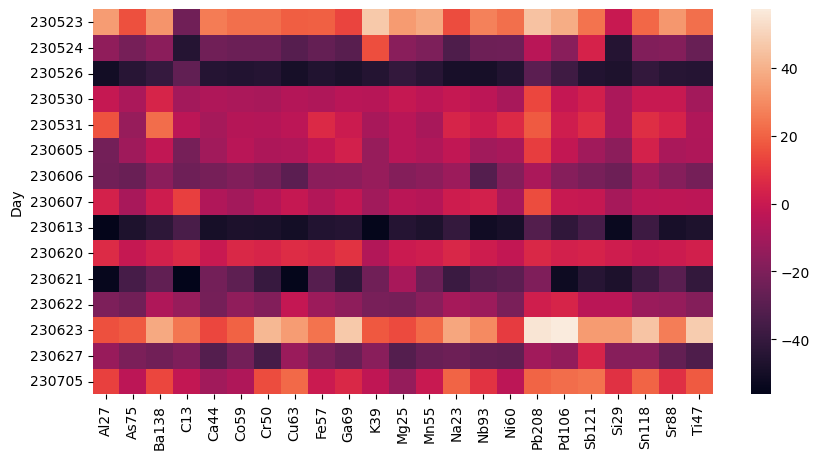

In [47]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(drift_pvc)

### Element correction

In [48]:
data_stnd_N = (data_stnd.divide(data_stnd['Ni60'].values, axis=0)).drop(columns=['C13','Ni60'])
data_stnd_N

Al27       As75       Ba138      Ca44  \
Day    Polymer Time   Batch N                                                
230523 PE      After  1     1   25.666510   1.429868  128.540133  4.119092   
                            2   26.632784   1.399822  139.065031  4.262319   
                            3   26.322011   1.281736  144.091278  4.352189   
               Before 1     1   27.927724   1.506202  144.521168  4.132528   
                            2   25.005318   1.328092  138.862270  4.148533   
...                                   ...        ...         ...       ...   
230705 PVC     Before 2     2   92.330283  16.431427  346.147713  9.075739   
                            3   89.329697  16.056232  349.819279  9.021106   
                      3     1  106.314705  17.222897  356.704001  9.760753   
                            2   99.231299  17.324840  365.966716  9.682193   
                            3  101.911123  16.856086  363.347634  9.678171   

                                   Co59       Cr50        Cu63      Fe57  \
Day    Polymer Time   Batch N                                              
230523 PE      After  1     1  5.707628   9.434935    6.314327  0.293953   
                            2  5.456901   9.788147    6.278909  0.301882   
                            3  5.654846   9.452616    6.254842  0.271554   
               Before 1     1  5.618985  10.137967    6.767156  0.313676   
                            2  5.244493   9.800892    5.706733  0.278235   
...                                 ...        ...         ...       ...   
230705 PVC     Before 2     2  5.264764  28.903067  116.620128  1.541729   
                            3  5.294106  27.888813  119.445053  1.500747   
                      3     1  5.897687  23.405009  119.725393  1.664510   
                            2  5.915808  22.954217  119.784700  1.698946   
                            3  5.930807  24.094143  121.630136  1.666769   

                                    Ga69        K39      Mg25        Mn55  \
Day    Polymer Time   Batch N                                               
230523 PE      After  1     1  12.354611   9.768327  1.357774   24.856789   
                            2  13.060591  12.009476  1.417280   26.921563   
                            3  12.109088  12.644352  1.365208   27.077879   
               Before 1     1  13.006808  10.740041  1.447745   26.610070   
                            2  12.091166   9.458113  1.411417   24.218689   
...                                  ...        ...       ...         ...   
230705 PVC     Before 2     2  28.396391  58.892788  3.244469  160.809825   
                            3  27.494811  60.298782  3.398437  164.128585   
                      3     1  29.711944  63.547607  3.674646  168.259935   
                            2  29.543109  62.457639  3.740444  170.631134   
                            3  28.458170  61.515902  3.759724  166.866762   

                                     Na23       Nb93       Pb208      Pd106  \
Day    Polymer Time   Batch N                                                 
230523 PE      After  1     1    9.650824  20.189031   20.821305   1.734124   
                            2    7.395103  21.141621   22.479136   1.871047   
                            3    7.494273  21.954694   22.628356   1.863067   
               Before 1     1    8.118475  21.586219   23.172652   1.838106   
                            2    7.219110  21.405988   20.260538   1.590977   
...                                   ...        ...         ...        ...   
230705 PVC     Before 2     2  119.320575  63.920678  247.208633  19.524414   
                            3  129.286601  63.057277  250.771621  21.505458   
                      3     1  120.511558  63.663855  256.272487  19.968560   
                            2  118.094598  67.326535  261.481252  19.972308   
                            3  121.419224  64.233430  264.512094  20.567776   

   

#### RSD within sample

In [49]:
data_stnd_N_mean = data_stnd_N.groupby(['Polymer', 'Day', 'Time','Batch']).agg('mean')

In [50]:
data_stnd_N_stdv = data_stnd_N.groupby(['Polymer', 'Day', 'Time','Batch']).agg('std')

In [51]:
data_stnd_N_rsd = data_stnd_N_stdv/data_stnd_N_mean*100
data_stnd_N_rsd.round(1)

Al27  As75  Ba138  Ca44  Co59  Cr50  Cu63  Fe57  \
Polymer Day    Time   Batch                                                    
Glass   230531 Before 1       2.7   2.8    0.4   2.0   1.5   1.1   1.6   0.6   
        230601 Before 1       1.7   2.6    2.1   1.2   0.4   1.9   1.1   1.9   
        230605 Before 1       0.9   4.8    1.3   0.7   1.5   2.5   2.4   1.1   
        230606 Before 1       2.8   4.6    2.3   3.4   2.6  19.9   7.5   3.0   
        230607 Before 1       3.4   4.7    1.9   2.4   2.1   3.4   3.8   2.5   
...                           ...   ...    ...   ...   ...   ...   ...   ...   
PVC     230627 Before 3      35.9   2.6    2.0   3.0   1.5   1.6   1.1   1.3   
        230705 After  1      17.6   1.0    5.7   3.6   0.8   3.6   1.4   1.5   
               Before 1       4.1   1.4    0.3   1.3   0.2   1.3   1.9   1.2   
                      2      14.6   1.2    4.1   0.6   1.3   3.6   2.5   1.8   
                      3       3.5   1.4    1.3   0.5   0.3   2.4   0.9   1.1   

                             Ga69   K39  Mg25  Mn55  Na23  Nb93  Pb208  Pd106  \
Polymer Day    Time   Batch                                                     
Glass   230531 Before 1       1.8   2.2   2.0   1.4   2.3   0.8    3.1    3.9   
        230601 Before 1       1.8   1.7   1.7   4.0   2.9   1.6    2.7    3.0   
        230605 Before 1       1.0   3.6   2.6   0.9   1.3   1.2    0.9    1.4   
        230606 Before 1       0.5  24.6  16.2   1.5   3.0   3.4    1.6    1.5   
        230607 Before 1       2.7   4.2   5.3   1.2   3.0   1.5    3.0    3.0   
...                           ...   ...   ...   ...   ...   ...    ...    ...   
PVC     230627 Before 3       7.0   3.2   2.6   3.5   4.4   6.1    3.6    5.0   
        230705 After  1       6.2   3.5   0.4   3.8   6.3   4.6    5.0    3.7   
               Before 1       3.3   2.4   2.5   3.9   2.0   1.6    1.6    1.3   
                      2       4.5   2.8   3.4   2.8   6.1   4.3    7.2    7.4   
                      3       2.3   1.6   1.2   1.1   1.4   3.0    1.6    1.7   

                             Sb121  Si29  Sn118  Sr88  Ti47  
Polymer Day    Time   Batch                                  
Glass   230531 Before 1        2.2   2.7    1.6   3.0   1.5  
        230601 Before 1        2.1   0.8    2.7   1.7   2.1  
        230605 Before 1       17.9   0.3    1.0   1.8   2.7  
        230606 Before 1        4.7   3.5    4.1   1.2  24.3  
        230607 Before 1        2.6   3.2   13.8   2.5   2.1  
...                            ...   ...    ...   ...   ...  
PVC     230627 Before 3        6.0   5.7    1.8   0.4   4.0  
        230705 After  1        4.7   3.1    4.4   2.3   6.0  
               Before 1        3.2   2.7    0.8   1.9   0.8  
                      2        3.0   8.8    2.2   1.7   5.1  
                      3        2.9   3.3    2.6   1.4   3.4  

[218 rows x 21 columns]

##### PVC

In [52]:
data_stnd_N_rsd_pvc = data_stnd_N_rsd.xs(level="Polymer", key="PVC")
data_stnd_N_rsd_pvc.round(1)

Al27  As75  Ba138  Ca44  Co59  Cr50  Cu63  Fe57  Ga69  \
Day    Time   Batch                                                          
230523 After  1       0.6   0.4    5.2   0.1   1.8   1.7   2.6   1.7   1.3   
       Before 1       2.8   4.8    6.1   3.4   4.3   1.4   7.4   8.9   7.6   
              2       7.9   1.9    3.9   1.4   2.2   2.6   1.7   1.9   1.6   
              3       4.7   0.9    5.3   3.1   0.8   2.4   0.8   1.0   1.4   
230524 After  1       4.5   1.1    3.9   3.0   1.7   2.0   2.6   1.5   0.5   
...                   ...   ...    ...   ...   ...   ...   ...   ...   ...   
230627 Before 3      35.9   2.6    2.0   3.0   1.5   1.6   1.1   1.3   7.0   
230705 After  1      17.6   1.0    5.7   3.6   0.8   3.6   1.4   1.5   6.2   
       Before 1       4.1   1.4    0.3   1.3   0.2   1.3   1.9   1.2   3.3   
              2      14.6   1.2    4.1   0.6   1.3   3.6   2.5   1.8   4.5   
              3       3.5   1.4    1.3   0.5   0.3   2.4   0.9   1.1   2.3   

                      K39  Mg25  Mn55  Na23  Nb93  Pb208  Pd106  Sb121  Si29  \
Day    Time   Batch                                                            
230523 After  1       0.6   1.5   4.2   2.3   4.9    4.8    1.9    3.6  16.4   
       Before 1       2.9   2.1  10.6   6.2   7.3    8.4    9.1    8.9  34.9   
              2       4.0   1.5   2.9   3.4   1.4    4.9    2.4    2.9   3.8   
              3       2.8   4.9   2.5   2.8   2.2    6.5    2.1    3.9   2.9   
230524 After  1      45.2   2.8   0.3   5.4   1.6    1.2    2.9    9.6  14.9   
...                   ...   ...   ...   ...   ...    ...    ...    ...   ...   
230627 Before 3       3.2   2.6   3.5   4.4   6.1    3.6    5.0    6.0   5.7   
230705 After  1       3.5   0.4   3.8   6.3   4.6    5.0    3.7    4.7   3.1   
       Before 1       2.4   2.5   3.9   2.0   1.6    1.6    1.3    3.2   2.7   
              2       2.8   3.4   2.8   6.1   4.3    7.2    7.4    3.0   8.8   
              3       1.6   1.2   1.1   1.4   3.0    1.6    1.7    2.9   3.3   

                     Sn118  Sr88  Ti47  
Day    Time   Batch                     
230523 After  1        2.0   0.6   1.8  
       Before 1        8.1   2.2   1.5  
              2        3.2   2.8   2.6  
              3        2.5   3.4   2.3  
230524 After  1        0.9   2.3   2.8  
...                    ...   ...   ...  
230627 Before 3        1.8   0.4   4.0  
230705 After  1        4.4   2.3   6.0  
       Before 1        0.8   1.9   0.8  
              2        2.2   1.7   5.1  
              3        2.6   1.4   3.4  

[69 rows x 21 columns]

In [53]:
data_stnd_N_rsd_pvc.mean()

Al27     11.370551
As75      2.927881
Ba138     4.649193
Ca44      2.986527
Co59      2.287047
           ...    
Sb121     3.908298
Si29      5.732003
Sn118     3.265149
Sr88      2.911722
Ti47      3.348817
Length: 21, dtype: float64

In [54]:
data_stnd_N_rsd_pvc.mean().std()

1.937505180396088

In [55]:
data_stnd_N_rsd_pvc.mean().mean()

4.0235718380602625

##### PE

In [56]:
data_stnd_N_rsd_pe = data_stnd_N_rsd.xs(level="Polymer", key="PE")
data_stnd_N_rsd_pe.round(1)

Al27  As75  Ba138  Ca44  Co59  Cr50  Cu63  Fe57  Ga69  \
Day    Time   Batch                                                          
230523 After  1       1.9   5.7    5.8   2.8   2.4   2.1   0.5   5.4   3.9   
       Before 1       7.7   9.9    3.9   1.8   4.7   3.7   6.9   6.0   4.1   
              2      10.3   9.0    9.3   6.9  10.2   7.3   7.6   7.7   9.4   
              3       9.7   7.6    7.8   6.6   7.6   8.6   6.1   6.0   6.8   
230524 After  1       6.5  15.3    9.3   8.3   5.3   3.8   9.9   8.4   6.5   
...                   ...   ...    ...   ...   ...   ...   ...   ...   ...   
230627 Before 2       3.4   7.8    2.5   5.2   1.5   4.1   2.7   4.0   4.9   
              3       2.5   2.6    7.0   4.7   3.7   4.6   0.6   1.7   3.2   
230705 Before 1      19.0   6.5    5.9   2.3   6.6   2.8   0.8   6.6   2.1   
              2       7.6   9.3    9.6   2.3   4.7   9.9   5.3   7.5   7.4   
              3       6.7   5.7    6.1   2.2   6.0   6.3   4.6   7.1   7.0   

                      K39  Mg25  Mn55  Na23  Nb93  Pb208  Pd106  Sb121  Si29  \
Day    Time   Batch                                                            
230523 After  1      13.2   2.3   4.7  15.6   4.2    4.6    4.2    3.4   3.2   
       Before 1       9.3   4.7   4.6  15.4   3.9    7.7    6.8    5.1   4.5   
              2      20.0   6.8   4.7  14.6   6.7    9.4    8.6    9.6   8.4   
              3      24.3   9.6   6.0  11.8   9.3    7.3    7.5    7.9  10.8   
230524 After  1      22.1   6.6   8.2  28.6   5.1    5.4    5.8    5.5   0.4   
...                   ...   ...   ...   ...   ...    ...    ...    ...   ...   
230627 Before 2       7.9   2.6   4.1   3.4   5.8    0.5    4.6    3.5   5.7   
              3       6.1   4.1   1.3  13.0   1.6    6.9    1.5    2.8   1.1   
230705 Before 1       5.1   3.9   5.1   9.8   3.7    6.9   17.2    2.3   2.1   
              2       9.9   4.7   1.1   2.2   7.7    1.2    9.5    7.1   3.1   
              3       2.1   7.4   2.1   4.4   3.8    2.4   11.0    6.8   4.2   

                     Sn118  Sr88  Ti47  
Day    Time   Batch                     
230523 After  1        6.6   3.0   4.9  
       Before 1        8.3   3.3   4.1  
              2        9.3   6.5   8.3  
              3        7.8   7.2   7.7  
230524 After  1       16.4   3.5   5.0  
...                    ...   ...   ...  
230627 Before 2        4.8   3.5   3.2  
              3        0.8   5.9   2.5  
230705 Before 1        8.3   5.1   6.1  
              2        8.9   0.5   6.6  
              3        6.5   1.1   1.7  

[68 rows x 21 columns]

In [57]:
data_stnd_N_rsd_pe.mean()

Al27     8.340896
As75     8.530636
Ba138    6.867301
Ca44     5.166974
Co59     5.694292
           ...   
Sb121    5.357615
Si29     7.200376
Sn118    7.314431
Sr88     5.100212
Ti47     6.102220
Length: 21, dtype: float64

In [58]:
data_stnd_N_rsd_pe.mean().std()

2.335131194938061

In [59]:
data_stnd_N_rsd_pe.mean().mean()

7.244808746001491

##### PS

In [60]:
data_stnd_N_rsd_ps = data_stnd_N_rsd.xs(level="Polymer", key="PS")
data_stnd_N_rsd_ps.round(1)

Al27  As75  Ba138  Ca44  Co59  Cr50  Cu63  Fe57  Ga69  \
Day    Time   Batch                                                          
230523 After  1      11.9  13.9   28.8   7.5   3.7  11.6   4.9   3.1   8.8   
       Before 1      21.2   9.8   40.5   2.9   3.1  11.2   3.2   8.7  12.9   
              2       5.1   3.8   45.3   0.7   3.1   2.6   1.2   3.3   7.3   
              3       7.3   6.7   32.6   4.8   2.7   5.8   9.4   5.9   6.3   
230524 After  1       4.4   4.6   49.3   5.3   8.8   8.3   7.6   2.0  10.2   
...                   ...   ...    ...   ...   ...   ...   ...   ...   ...   
230627 Before 2       4.0   4.4   13.2   3.6   1.1   4.2   2.1   4.1   3.7   
              3       4.6   4.8   38.9   5.1   8.8   6.4   7.5   8.4   4.9   
230705 Before 1       9.5  13.9   39.0   7.6  13.9  13.5  12.6  20.8  14.6   
              2       1.2   3.1    5.8   7.7   1.8   3.1   2.1   4.3   2.5   
              3       8.1   8.8   35.3  32.8   6.4   5.4   1.4   7.9   8.8   

                      K39  Mg25  Mn55  Na23  Nb93  Pb208  Pd106  Sb121  Si29  \
Day    Time   Batch                                                            
230523 After  1       4.1   2.9   2.5   6.1  11.2   17.4   36.5    5.2  57.7   
       Before 1       4.4   2.9   1.7  10.4  12.1   32.0   21.1    7.7  14.1   
              2       3.0   1.2   2.7   1.2   2.8   21.0   29.4    2.8  19.9   
              3       5.7   4.5   4.9   4.6   9.5   25.3   28.4    6.1  28.6   
230524 After  1       5.8   0.8   5.6   7.5   7.0   20.5   52.0    2.8  34.6   
...                   ...   ...   ...   ...   ...    ...    ...    ...   ...   
230627 Before 2       6.7   4.1   1.2   4.0  10.0    6.6    6.4    5.6   3.5   
              3       7.4  11.2   3.0   9.9   6.7   42.9   51.7   12.1  41.9   
230705 Before 1       7.6   2.9   9.7   2.9  14.0   31.3   12.0    8.3   3.6   
              2      12.3   9.6  13.2  17.5   2.4   10.4    4.0    2.0   5.5   
              3      31.5  31.7  22.9  35.0  11.0   26.1   37.6   20.8  28.9   

                     Sn118  Sr88  Ti47  
Day    Time   Batch                     
230523 After  1       18.9   9.1  11.4  
       Before 1       13.7   5.1  11.0  
              2        4.6   5.5   2.4  
              3        9.6  12.1   5.5  
230524 After  1        6.5  16.9  10.5  
...                    ...   ...   ...  
230627 Before 2        7.0   4.1   7.6  
              3        6.5  14.3   5.9  
230705 Before 1       17.1   8.9  14.7  
              2        4.3   7.7   5.8  
              3        6.0  24.2   4.4  

[68 rows x 21 columns]

In [61]:
data_stnd_N_rsd_ps.mean()

Al27     19.512497
As75     15.299598
Ba138    44.715814
Ca44     10.449706
Co59      5.087995
           ...    
Sb121    14.917897
Si29     21.521853
Sn118    17.012605
Sr88     12.404002
Ti47     16.245465
Length: 21, dtype: float64

In [62]:
data_stnd_N_rsd_ps.mean().std()

8.81020861837911

In [63]:
data_stnd_N_rsd_ps.mean().mean()

16.387016851693765

#### RSD within batch

In [64]:
data_stnd_N_before = data_stnd_N.xs(level="Time", key="Before")

In [65]:
data_stnd_N_before_mean = data_stnd_N_before.groupby(['Polymer', 'Day','Batch']).agg('mean')
data_stnd_N_before_mean

Al27       As75       Ba138        Ca44      Co59  \
Polymer Day    Batch                                                            
Glass   230531 1      509.869821   0.691750    9.337855  284.291356  4.401229   
        230601 1      518.783103   0.676872    9.103494  280.062905  4.398158   
        230605 1      567.741168   0.706117    9.846430  302.647045  4.360723   
        230606 1      528.745397   0.748149    9.418724  289.658699  4.263613   
        230607 1      554.072056   0.680651    9.147230  291.190235  4.364681   
...                          ...        ...         ...         ...       ...   
PVC     230627 2      104.488219  16.971668  367.047632    9.130161  5.253957   
               3      131.534705  15.676033  374.548955   10.109971  5.844619   
        230705 1       85.108549  15.044909  309.125799   10.817921  5.467644   
               2       99.151695  16.270213  340.006375    9.023138  5.240925   
               3      102.485709  17.134607  362.006117    9.707039  5.914767   

                           Cr50        Cu63      Fe57       Ga69        K39  \
Polymer Day    Batch                                                          
Glass   230531 1       0.498114    2.550282  0.557994   4.496097  11.376457   
        230601 1       0.493619    2.453085  0.527890   4.526482  10.419573   
        230605 1       0.520476    2.509562  0.675561   4.637542  10.295977   
        230606 1       0.561600    3.046529  0.537831   4.638927  17.139209   
        230607 1       0.507952    2.464228  0.538061   4.638512  10.362843   
...                         ...         ...       ...        ...        ...   
PVC     230627 2      28.644691  116.086363  1.538484  31.568191  62.580261   
               3      24.174942  120.373699  1.648109  32.926666  62.428957   
        230705 1      26.716422   63.012987  1.450952  29.280479  63.246952   
               2      27.897122  116.558591  1.511454  28.640554  58.735387   
               3      23.484456  120.380076  1.676742  29.237741  62.507050   

                          Mg25        Mn55          Na23       Nb93  \
Polymer Day    Batch                                                  
Glass   230531 1      0.469786    7.030317   9498.748001   7.181467   
        230601 1      0.447038    6.903044   9864.392788   6.894389   
        230605 1      0.466882    6.998665  10041.374168   7.355050   
        230606 1      0.610295    6.903749  10354.194439   6.921953   
        230607 1      0.450573    6.681293  10104.089547   7.114940   
...                        ...         ...           ...        ...   
PVC     230627 2      3.433825  166.740655    131.620626  65.557277   
               3      3.836268  169.530302    126.033741  65.082978   
        230705 1      4.665987  165.287288     90.937358  55.058564   
               2      3.276287  160.090634    121.190603  61.979433   
               3      3.724938  168.585944    120.008460  65.074607   

                           Pb208      Pd106       Sb121        Si29  \
Polymer Day    Batch                                                  
Glass   230531 1        6.022940   0.091971    3.841040  414.845188   
        230601 1        5.907999   0.084521    3.652903  431.219493   
        230605 1        6.442699   0.094472    4.237832  428.034499   
        230606 1        6.590838   0.098110    3.968606  452.553801   
        230607 1        5.951947   0.088021    3.680598  433.964399   
...                          ...        ...         ...         ...   
PVC     230627 2      259.552527  19.458420  149.037110    2.290776   
               3      276.335138  19.734793  146.481964    2.478755   
        230705 1      224.162458  11.131977   74.794709    1.536312   
               2      239.120764  19.882113  140.959303    2.406154   
               3      260.755278  20.169548  154.153197    2.549145   

                          Sn118       Sr88       Ti47  
Polymer Day    Batch                      

In [66]:
data_stnd_N_batch_mean = data_stnd_N_before_mean.groupby(['Polymer', 'Day']).agg('mean')

In [67]:
data_stnd_N_batch_stdv = data_stnd_N_before_mean.groupby(['Polymer', 'Day']).agg('std')

In [68]:
data_stnd_N_batch_rsd = (data_stnd_N_batch_stdv/data_stnd_N_batch_mean*100).dropna()
data_stnd_N_batch_rsd.round(1)

Al27  As75  Ba138  Ca44  Co59  Cr50  Cu63  Fe57  Ga69   K39  \
Polymer Day                                                                   
PE      230523  21.8   5.4    3.9   2.0  10.0   2.8  11.0  21.9  11.3   7.4   
        230524  29.0   8.0    6.8   3.3  14.1   9.0  13.8  29.0  16.6   9.6   
        230526  22.3   9.8    3.1   1.6  10.9   6.5   9.8  26.5  13.6  14.7   
        230530  31.6  16.4    7.5   3.7  15.0  12.3  15.3  30.4  18.4   7.1   
        230531  29.3  12.3    9.9   2.9  17.2   9.6  16.8  31.3  18.7  21.6   
...              ...   ...    ...   ...   ...   ...   ...   ...   ...   ...   
PVC     230621  47.6   5.4    5.7   8.8   3.3  13.6  31.4   4.5  10.9   4.8   
        230622   8.3   8.3    7.7   8.9   5.3  10.5  33.3   7.1   7.5   7.1   
        230623  24.2   5.8   17.6  10.6   8.7   2.4  31.0  11.1  13.6   7.5   
        230627  19.4   6.4    6.0   8.9   5.4   9.8  32.6   5.5   4.4   2.5   
        230705   9.6   6.5    7.9   9.2   6.2   8.8  32.1   7.6   1.2   3.9   

                Mg25  Mn55  Na23  Nb93  Pb208  Pd106  Sb121  Si29  Sn118  \
Polymer Day                                                                
PE      230523   1.2   5.2  18.9   5.5    0.7   87.9    4.1   3.9    9.5   
        230524   5.2   7.2  19.8  11.2    4.4   92.8   11.1   9.5    9.3   
        230526   2.0   3.7  21.0   6.8    3.7   92.9    9.6   7.5   13.7   
        230530   7.2   6.3  22.0  12.5    3.1   93.3   13.0   5.0   20.4   
        230531   6.0   6.4  19.9  14.8    2.1   94.4   10.3   9.1   20.3   
...              ...   ...   ...   ...    ...    ...    ...   ...    ...   
PVC     230621  17.0   3.0  14.6   6.5    5.7   32.8   23.1  20.9   18.3   
        230622  17.7   2.6  17.0   9.4    7.4   29.1   34.3  25.0   14.5   
        230623  20.8   8.0  11.3  10.9   27.8   28.8   34.3  21.0   22.3   
        230627  17.5   0.8  15.1   9.0    4.1   27.0   32.2  23.2   11.8   
        230705  18.2   2.6  15.5   8.4    7.6   30.1   34.5  25.3    9.9   

                Sr88  Ti47  
Polymer Day                 
PE      230523   4.3   0.9  
        230524   7.4  10.0  
        230526   3.2   4.2  
        230530   5.2   5.7  
        230531   5.9   6.7  
...              ...   ...  
PVC     230621   6.2  17.4  
        230622   5.7  11.1  
        230623   9.8   2.8  
        230627   4.1  11.6  
        230705   4.7   7.6  

[51 rows x 21 columns]

##### PVC

In [69]:
data_stnd_N_batch_rsd_pvc = data_stnd_N_batch_rsd.xs(level="Polymer", key="PVC")
data_stnd_N_batch_rsd_pvc

,Al27,As75,Ba138,Ca44,Co59,Cr50,Cu63,Fe57,Ga69,K39,Mg25,Mn55,Na23,Nb93,Pb208,Pd106,Sb121,Si29,Sn118,Sr88,Ti47
Day,,,,,,,,,,,,,,,,,,,,,
230523,62.653961,4.897241,12.700914,1.215182,23.480951,8.471325,26.836161,27.507131,30.999084,58.392836,12.322276,65.961540,29.087822,14.107341,14.965251,72.932482,52.018989,40.604542,6.709526,12.455360,10.778453
230524,4.164758,5.813883,3.519068,0.521983,2.406159,5.774200,5.679241,5.024483,9.540862,5.692176,0.753531,3.618842,16.156209,2.390179,4.329871,4.746016,9.996455,3.430570,0.815699,2.643860,7.008043
230526,19.717279,6.629277,5.277416,1.419094,1.727717,3.211841,13.294962,1.173082,5.076610,4.779668,2.400320,3.102989,15.436417,7.892781,3.303630,1.916532,13.179361,2.598214,0.826720,3.530271,3.845391
230530,3.557778,3.451641,3.053279,0.550541,1.805359,3.677769,8.678383,3.672884,7.792704,4.444431,1.639002,1.059237,19.729140,4.373565,3.087503,5.147990,4.121120,1.419998,1.882570,2.327402,5.051061
230531,14.783886,7.860750,4.691900,2.419384,0.333741,7.041838,12.484410,4.674446,6.922750,3.979994,1.405109,2.137115,14.850235,11.342752,3.909891,4.698671,9.673106,9.164125,4.315414,3.786764,8.257849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230621,47.601144,5.388997,5.727770,8.811751,3.303514,13.590224,31.416620,4.490815,10.882119,4.818889,16.967246,2.989712,14.593881,6.531779,5.686019,32.848572,23.116148,20.904934,18.343461,6.182007,17.449197
230622,8.336715,8.347946,7.700014,8.922860,5.349153,10.517703,33.285881,7.138089,7.466310,7.081462,17.743296,2.641752,17.010397,9.374059,7.415376,29.076515,34.307570,25.023788,14.478629,5.733758,11.060716
230623,24.162895,5.755398,17.583212,10.613528,8.666751,2.426189,31.026591,11.093531,13.584595,7.499097,20.758856,8.024033,11.265853,10.866975,27.781487,28.803054,34.321344,20.974075,22.311287,9.780217,2.804500


In [70]:
data_stnd_N_batch_rsd_pvc.mean()

Al27     17.654177
As75      6.385828
Ba138     7.502845
Ca44      4.232930
Co59      4.211838
           ...    
Sb121    18.070466
Si29     12.423032
Sn118     6.878566
Sr88      5.456669
Ti47      8.381433
Length: 21, dtype: float64

In [71]:
data_stnd_N_batch_rsd_pvc.mean().std()

4.731544664358734

In [72]:
data_stnd_N_batch_rsd_pvc.mean().mean()

9.659079079653402

##### PE

In [73]:
data_stnd_N_batch_rsd_pe = data_stnd_N_batch_rsd.xs(level="Polymer", key="PE")
data_stnd_N_batch_rsd_pe

,Al27,As75,Ba138,Ca44,Co59,Cr50,Cu63,Fe57,Ga69,K39,Mg25,Mn55,Na23,Nb93,Pb208,Pd106,Sb121,Si29,Sn118,Sr88,Ti47
Day,,,,,,,,,,,,,,,,,,,,,
230523,21.751871,5.402857,3.934549,2.017883,10.008719,2.772749,10.951816,21.940217,11.338115,7.449036,1.199626,5.220365,18.904159,5.549270,0.710744,87.854564,4.075753,3.886785,9.506043,4.253804,0.866417
230524,29.028354,7.977105,6.816945,3.268298,14.117221,9.045103,13.817701,28.991664,16.622784,9.570202,5.160370,7.223420,19.836757,11.216129,4.446466,92.829873,11.078051,9.497347,9.307647,7.367973,10.035549
230526,22.305073,9.809480,3.098973,1.571192,10.906361,6.507425,9.811637,26.517849,13.629386,14.702983,1.973987,3.746289,21.019223,6.761338,3.661055,92.902013,9.639913,7.541617,13.666637,3.219609,4.180513
230530,31.561472,16.437284,7.491088,3.692024,14.977407,12.324991,15.310069,30.355312,18.350897,7.066303,7.188774,6.337468,22.039851,12.486242,3.071424,93.337382,13.021702,4.984919,20.362590,5.153506,5.661872
230531,29.317604,12.296673,9.872795,2.908427,17.191016,9.614232,16.774583,31.274602,18.684342,21.633648,6.046611,6.427345,19.867841,14.774636,2.143974,94.391594,10.315877,9.054055,20.294657,5.892003,6.738088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230621,32.605279,5.253974,2.575210,1.536997,3.873875,4.069213,5.204682,12.468170,18.118640,5.497661,2.079811,1.745675,16.117941,4.922148,2.082851,12.969392,4.653678,7.047873,3.423590,0.406202,2.672411
230622,41.845483,5.978787,7.252729,3.320128,9.756560,4.577584,11.553593,5.248101,10.725526,4.406652,5.576152,3.438770,16.773619,11.239871,6.799436,5.833211,9.242171,4.008477,5.413328,8.731245,10.138340
230623,20.373897,2.853831,4.031958,5.489279,0.769031,1.604801,3.902248,15.064396,16.887576,6.866740,3.127278,3.352686,20.622637,8.398950,3.161841,23.818368,5.624473,4.826471,8.428831,1.904443,3.582745


In [74]:
data_stnd_N_batch_rsd_pe.mean()

Al27     27.427056
As75      8.095527
Ba138     5.631091
Ca44      4.718740
Co59      9.851006
           ...    
Sb121     8.898578
Si29      6.412103
Sn118    12.361710
Sr88      5.927514
Ti47      5.772946
Length: 21, dtype: float64

In [75]:
data_stnd_N_batch_rsd_pe.mean().std()

14.567416147375962

In [76]:
data_stnd_N_batch_rsd_pe.mean().mean()

13.203998826950345

##### PS

In [77]:
data_stnd_N_batch_rsd_ps = data_stnd_N_batch_rsd.xs(level="Polymer", key="PS")
data_stnd_N_batch_rsd_ps

,Al27,As75,Ba138,Ca44,Co59,Cr50,Cu63,Fe57,Ga69,K39,Mg25,Mn55,Na23,Nb93,Pb208,Pd106,Sb121,Si29,Sn118,Sr88,Ti47
Day,,,,,,,,,,,,,,,,,,,,,
230523,10.868304,10.471936,67.116396,2.264686,1.079086,17.559406,7.454152,10.399435,2.397495,8.463840,2.838813,1.557629,4.335692,8.898855,43.661845,23.331839,18.972301,5.129411,14.295632,20.440277,19.415537
230524,20.308269,9.275476,41.439733,7.061328,3.529725,8.243030,3.695365,7.480047,11.596802,11.010247,6.333219,5.232144,5.359464,9.906068,26.225395,28.444452,1.651266,18.327610,6.568235,16.347228,8.652329
230526,21.382965,3.829738,64.994196,7.939436,4.729118,10.589831,3.877313,6.700445,19.302305,18.736835,11.227509,8.182496,9.786638,2.619089,48.510229,24.756656,8.126336,12.290108,7.159801,22.927954,10.970563
230530,10.503264,1.923426,33.849411,5.190943,5.534759,8.076150,5.297025,3.864981,6.809211,9.618897,7.064778,5.266408,9.177566,5.561851,32.050619,19.127943,8.967850,12.957879,8.065631,12.015832,8.732798
230531,32.257452,21.771546,53.278299,12.316747,5.353664,21.210968,7.143772,20.520489,32.702793,13.671565,9.625667,10.285253,13.899603,21.648429,15.740346,40.227736,18.530842,32.026274,20.362716,19.705676,21.469246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230621,43.424300,21.292659,60.063203,4.790998,6.821878,29.901280,40.224356,14.160384,31.811607,18.663233,15.903110,19.852570,16.186435,38.088789,32.368851,40.604520,53.671601,42.042485,48.212658,22.407821,28.773303
230622,36.153085,12.718241,48.452803,18.222109,6.636593,13.333779,41.347868,7.251154,21.277332,8.061715,23.787508,23.146816,25.357238,42.327077,44.422868,57.128227,48.752214,61.929188,47.710287,15.533074,12.200983
230623,29.993228,8.983135,37.613652,9.391687,6.323778,5.299696,38.139164,3.868764,18.662021,19.213177,15.868567,25.410874,9.205976,25.669324,25.464143,33.672695,51.893112,40.884831,34.833500,18.826254,2.479688


In [78]:
data_stnd_N_batch_rsd_ps.mean()

Al27     25.075539
As75     18.495906
Ba138    57.753901
Ca44     13.519999
Co59      6.864962
           ...    
Sb121    29.290854
Si29     32.941950
Sn118    26.713188
Sr88     25.918204
Ti47     21.816499
Length: 21, dtype: float64

In [79]:
data_stnd_N_batch_rsd_ps.mean().std()

10.817996923380663

In [80]:
data_stnd_N_batch_rsd_ps.mean().mean()

23.434383983836938

#### RSD between run

In [81]:
data_stnd_N_before_mean2 = data_stnd_N_before.groupby(['Polymer', 'Day']).agg('mean')
data_stnd_N_before_mean2

Al27       As75       Ba138        Ca44      Co59  \
Polymer Day                                                               
Glass   230531  509.869821   0.691750    9.337855  284.291356  4.401229   
        230601  518.783103   0.676872    9.103494  280.062905  4.398158   
        230605  567.741168   0.706117    9.846430  302.647045  4.360723   
        230606  528.745397   0.748149    9.418724  289.658699  4.263613   
        230607  554.072056   0.680651    9.147230  291.190235  4.364681   
...                    ...        ...         ...         ...       ...   
PVC     230621  127.583715  16.153708  327.373889    9.801835  5.428884   
        230622   99.137799  14.892771  321.470195    9.749030  5.474949   
        230623  117.937995  16.347502  334.379934    9.853941  5.436426   
        230627  108.694552  15.874016  358.596365   10.051890  5.535093   
        230705   95.581985  16.149910  337.046097    9.849366  5.541112   

                     Cr50       Cu63      Fe57       Ga69        K39  \
Polymer Day                                                            
Glass   230531   0.498114   2.550282  0.557994   4.496097  11.376457   
        230601   0.493619   2.453085  0.527890   4.526482  10.419573   
        230605   0.520476   2.509562  0.675561   4.637542  10.295977   
        230606   0.561600   3.046529  0.537831   4.638927  17.139209   
        230607   0.507952   2.464228  0.538061   4.638512  10.362843   
...                   ...        ...       ...        ...        ...   
PVC     230621  28.211103  97.205123  1.523978  34.094685  59.008043   
        230622  26.387856  98.471647  1.532327  30.146678  63.447181   
        230623  24.970121  97.752147  1.531665  30.820832  60.668546   
        230627  25.726157  99.538377  1.555520  31.545585  63.435046   
        230705  26.032667  99.983885  1.546382  29.052925  61.496463   

                    Mg25        Mn55          Na23       Nb93       Pb208  \
Polymer Day                                                                 
Glass   230531  0.469786    7.030317   9498.748001   7.181467    6.022940   
        230601  0.447038    6.903044   9864.392788   6.894389    5.907999   
        230605  0.466882    6.998665  10041.374168   7.355050    6.442699   
        230606  0.610295    6.903749  10354.194439   6.921953    6.590838   
        230607  0.450573    6.681293  10104.089547   7.114940    5.951947   
...                  ...         ...           ...        ...         ...   
PVC     230621  3.671678  160.210780    108.031661  57.366977  223.133697   
        230622  3.847591  164.111761    111.940966  58.416920  222.212513   
        230623  3.906924  162.480301    109.694557  58.122012  238.925887   
        230627  4.023449  168.072351    118.643621  62.087991  264.015615   
        230705  3.889071  164.654622    110.712140  60.704201  241.346166   

                    Pd106       Sb121        Si29      Sn118       Sr88  \
Polymer Day                                                               
Glass   230531   0.091971    3.841040  414.845188   2.985013  16.858382   
        230601   0.084521    3.652903  431.219493   3.033225  16.053205   
        230605   0.094472    4.237832  428.034499   3.166962  18.051299   
        230606   0.098110    3.968606  452.553801   3.289520  15.574211   
        230607   0.088021    3.680598  433.964399   3.375823  15.945522   
...                   ...         ...         ...        ...        ...   
PVC     230621  17.103834  103.199340    1.951573  22.225019  65.767631   
        230622  15.970816  107.437007    2.019456  19.385780  66.007661   
        230623  16.169866  133.795572    2.078887  21.719730  66.807511   
        230627  16.951085  124.580896    2.107813  21.766817  69.952783   
        230705  17.061213  123.302403    2.163871  20.286154  68.087763   

                     Ti47  
Polymer Day                
Glass   230531   0.395479  
        230601   0.386871  
        230605   0.

In [82]:
data_stnd_N_run_mean = data_stnd_N_before_mean2.groupby(['Polymer']).agg('mean')
data_stnd_N_run_mean

,Al27,As75,Ba138,Ca44,Co59,Cr50,Cu63,Fe57,Ga69,K39,Mg25,Mn55,Na23,Nb93,Pb208,Pd106,Sb121,Si29,Sn118,Sr88,Ti47
Polymer,,,,,,,,,,,,,,,,,,,,,
Glass,620.355507,0.673634,9.689669,317.618584,4.391397,0.530640,2.615552,0.660361,4.612783,12.018962,0.495715,7.138214,10710.913007,7.507102,6.150369,0.091396,3.791006,447.276231,3.154959,18.966273,0.433823
PE,40.601897,1.474041,139.945339,4.499763,6.386247,10.319698,7.374096,0.391840,15.574525,10.824855,1.463876,28.343407,6.738178,21.180550,20.756148,14.780796,27.840755,1.065970,5.828590,49.938631,11.111341
PS,30.641704,0.604538,80.861554,3.610738,1.192452,4.328263,4.732225,1.124950,10.586879,9.961394,1.252872,32.529540,7.133177,18.108671,15.017637,1.762136,20.262594,0.325896,4.599622,21.155220,4.131745
PVC,81.814688,13.149747,291.791276,10.578236,5.745850,22.782754,65.755781,1.471395,28.405658,55.897318,4.289963,153.833621,96.322498,47.141633,203.095880,11.641192,68.086205,1.646422,17.767662,61.429178,20.093749


In [83]:
data_stnd_N_run_stdv = data_stnd_N_before_mean2.groupby(['Polymer']).agg('std')
data_stnd_N_run_stdv

,Al27,As75,Ba138,Ca44,Co59,Cr50,Cu63,Fe57,Ga69,K39,Mg25,Mn55,Na23,Nb93,Pb208,Pd106,Sb121,Si29,Sn118,Sr88,Ti47
Polymer,,,,,,,,,,,,,,,,,,,,,
Glass,87.972482,0.031344,0.482924,29.508882,0.074059,0.026832,0.155740,0.099101,0.086935,1.942076,0.046836,0.263491,781.160383,0.452743,0.309414,0.007522,0.190027,20.378951,0.143038,2.349089,0.029995
PE,12.917629,0.099315,12.213238,0.225697,0.814009,1.062597,0.589951,0.051681,2.074881,0.867414,0.163806,1.353938,0.720553,2.468234,2.001020,3.553266,2.964046,0.154782,0.745711,3.441808,1.044434
PS,6.206641,0.145077,25.219587,0.530728,0.064178,0.894588,0.621325,0.245985,2.108030,1.235772,0.209861,2.580671,1.450453,3.896775,3.278301,0.655536,4.504054,0.115558,1.062780,4.164648,0.849985
PVC,20.902468,2.217506,31.965547,0.507207,0.300750,2.567714,22.025265,0.068544,2.627470,6.163746,0.333390,14.983078,12.053004,8.758358,26.377883,3.401201,37.515331,0.297072,2.528467,4.529982,1.646671


In [84]:
data_stnd_N_run_rsd = (data_stnd_N_run_stdv/data_stnd_N_run_mean*100).dropna()
data_stnd_N_run_rsd.round(1)

,Al27,As75,Ba138,Ca44,Co59,Cr50,Cu63,Fe57,Ga69,K39,Mg25,Mn55,Na23,Nb93,Pb208,Pd106,Sb121,Si29,Sn118,Sr88,Ti47
Polymer,,,,,,,,,,,,,,,,,,,,,
Glass,14.2,4.7,5.0,9.3,1.7,5.1,6.0,15.0,1.9,16.2,9.4,3.7,7.3,6.0,5.0,8.2,5.0,4.6,4.5,12.4,6.9
PE,31.8,6.7,8.7,5.0,12.7,10.3,8.0,13.2,13.3,8.0,11.2,4.8,10.7,11.7,9.6,24.0,10.6,14.5,12.8,6.9,9.4
PS,20.3,24.0,31.2,14.7,5.4,20.7,13.1,21.9,19.9,12.4,16.8,7.9,20.3,21.5,21.8,37.2,22.2,35.5,23.1,19.7,20.6
PVC,25.5,16.9,11.0,4.8,5.2,11.3,33.5,4.7,9.2,11.0,7.8,9.7,12.5,18.6,13.0,29.2,55.1,18.0,14.2,7.4,8.2


In [85]:
data_stnd_N_run_rsd.std(axis=1)

Polymer
Glass     4.128197
PE        6.173434
PS        7.742018
PVC      11.964785
dtype: float64

In [86]:
data_stnd_N_run_rsd.mean(axis=1)

Polymer
Glass     7.237294
PE       11.624315
PS       20.482045
PVC      15.564210
dtype: float64

#### Drift over time

This is calculated using the formula for percent change: (new – old)/old * 100%.

In [87]:
data_stnd_N_time_mean = data_stnd_N.groupby(['Polymer', 'Day', 'Time']).agg('mean')

In [88]:
data_stnd_N_time_mean_opt = ((data_stnd_N_time_mean)
                                .drop(index=('PE', 230601, 'Before'))
                                .drop(index=('PE', 230614, 'Before'))
                                .drop(index=('PE', 230705, 'Before'))
                                .drop(index=('PS', 230601, 'Before'))
                                .drop(index=('PS', 230614, 'Before'))
                                .drop(index=('PS', 230705, 'Before'))
                                .drop(index=('PVC', 230601, 'Before'))
                                .drop(index=('PVC', 230614, 'Before'))                           
                          )
data_stnd_N_time_mean_opt

Al27       As75       Ba138        Ca44  \
Polymer Day    Time                                                    
Glass   230531 Before  509.869821   0.691750    9.337855  284.291356   
        230601 Before  518.783103   0.676872    9.103494  280.062905   
        230605 Before  567.741168   0.706117    9.846430  302.647045   
        230606 Before  528.745397   0.748149    9.418724  289.658699   
        230607 Before  554.072056   0.680651    9.147230  291.190235   
...                           ...        ...         ...         ...   
PVC     230623 Before  117.937995  16.347502  334.379934    9.853941   
        230627 After   126.046358  17.484455  383.403315    9.685347   
               Before  108.694552  15.874016  358.596365   10.051890   
        230705 After   110.815153  15.970126  392.411588    9.257674   
               Before   95.581985  16.149910  337.046097    9.849366   

                           Co59       Cr50        Cu63      Fe57       Ga69  \
Polymer Day    Time                                                           
Glass   230531 Before  4.401229   0.498114    2.550282  0.557994   4.496097   
        230601 Before  4.398158   0.493619    2.453085  0.527890   4.526482   
        230605 Before  4.360723   0.520476    2.509562  0.675561   4.637542   
        230606 Before  4.263613   0.561600    3.046529  0.537831   4.638927   
        230607 Before  4.364681   0.507952    2.464228  0.538061   4.638512   
...                         ...        ...         ...       ...        ...   
PVC     230623 Before  5.436426  24.970121   97.752147  1.531665  30.820832   
        230627 After   5.927407  23.098490  117.130087  1.692215  31.885907   
               Before  5.535093  25.726157   99.538377  1.555520  31.545585   
        230705 After   5.282491  31.362618  119.767451  1.588394  31.743012   
               Before  5.541112  26.032667   99.983885  1.546382  29.052925   

                             K39      Mg25        Mn55          Na23  \
Polymer Day    Time                                                    
Glass   230531 Before  11.376457  0.469786    7.030317   9498.748001   
        230601 Before  10.419573  0.447038    6.903044   9864.392788   
        230605 Before  10.295977  0.466882    6.998665  10041.374168   
        230606 Before  17.139209  0.610295    6.903749  10354.194439   
        230607 Before  10.362843  0.450573    6.681293  10104.089547   
...                          ...       ...         ...           ...   
PVC     230623 Before  60.668546  3.906924  162.480301    109.694557   
        230627 After   75.252555  3.903137  174.514256    122.792514   
               Before  63.435046  4.023449  168.072351    118.643621   
        230705 After   62.374380  3.554109  170.612481    135.588266   
               Before  61.496463  3.889071  164.654622    110.712140   

                            Nb93       Pb208      Pd106       Sb121  \
Polymer Day    Time                                                   
Glass   230531 Before   7.181467    6.022940   0.091971    3.841040   
        230601 Before   6.894389    5.907999   0.084521    3.652903   
        230605 Before   7.355050    6.442699   0.094472    4.237832   
        230606 Before   6.921953    6.590838   0.098110    3.968606   
        230607 Before   7.114940    5.951947   0.088021    3.680598   
...                          ...         ...        ...         ...   
PVC     230623 Before  58.122012  238.925887  16.169866  133.795572   
        230627 After   62.652589  331.783547  19.570449  175.817421   
               Before  62.087991  264.015615  16.951085  124.580896   
        230705 After   67.667224  297.331850  20.656911  148.374777   
               Before  60.704201  241.346166  17.061213  123.302403   

                             Si29      Sn118       Sr88       Ti47  
Polymer Day    Time                                                 
Glass   230531 Before  414.845188   2.985013  16.858382   0.39547

In [89]:
data_stnd_N_before = data_stnd_N_time_mean_opt.xs(level="Time", key="Before")

In [90]:
data_stnd_N_after = data_stnd_N_time_mean_opt.xs(level="Time", key="After")

In [91]:
drift_N = (data_stnd_N_after-data_stnd_N_before)/data_stnd_N_before*100
drift_N

Al27       As75      Ba138      Ca44      Co59  \
Polymer Day                                                           
Glass   230531        NaN        NaN        NaN       NaN       NaN   
        230601        NaN        NaN        NaN       NaN       NaN   
        230605        NaN        NaN        NaN       NaN       NaN   
        230606        NaN        NaN        NaN       NaN       NaN   
        230607        NaN        NaN        NaN       NaN       NaN   
...                   ...        ...        ...       ...       ...   
PVC     230621 -34.684588  -8.487937   1.619665  7.982704 -0.631030   
        230622   0.201565  -4.030453  16.442727 -0.814960  6.756226   
        230623   7.831130   5.805461  23.467463  2.643262  7.968175   
        230627  15.963823  10.145123   6.917792 -3.646512  7.087760   
        230705  15.937280  -1.113220  16.426682 -6.007409 -4.667310   

                     Cr50       Cu63       Fe57       Ga69        K39  \
Polymer Day                                                             
Glass   230531        NaN        NaN        NaN        NaN        NaN   
        230601        NaN        NaN        NaN        NaN        NaN   
        230605        NaN        NaN        NaN        NaN        NaN   
        230606        NaN        NaN        NaN        NaN        NaN   
        230607        NaN        NaN        NaN        NaN        NaN   
...                   ...        ...        ...        ...        ...   
PVC     230621 -13.954584 -36.733306  -3.354239 -18.396459   6.546135   
        230622   2.188379  19.262317  10.024351   5.332242  -1.257604   
        230623  28.278594  17.987800  10.989325  32.530975   6.164442   
        230627 -10.213990  17.673294   8.787768   1.078827  18.629306   
        230705  20.474087  19.786755   2.716790   9.259265   1.427589   

                     Mg25      Mn55       Na23       Nb93      Pb208  \
Polymer Day                                                            
Glass   230531        NaN       NaN        NaN        NaN        NaN   
        230601        NaN       NaN        NaN        NaN        NaN   
        230605        NaN       NaN        NaN        NaN        NaN   
        230606        NaN       NaN        NaN        NaN        NaN   
        230607        NaN       NaN        NaN        NaN        NaN   
...                   ...       ...        ...        ...        ...   
PVC     230621  26.216394  5.154474 -13.442792  -3.099443  12.830800   
        230622   0.060160  4.859978  12.160889   9.836713  27.756138   
        230623   4.278216  9.183640  21.964425  15.607401  38.908644   
        230627  -2.990269  3.832817   3.496937   0.909351  25.668153   
        230705  -8.612896  3.618398  22.469194  11.470414  23.197254   

                    Pd106      Sb121       Si29      Sn118       Sr88  \
Polymer Day                                                             
Glass   230531        NaN        NaN        NaN        NaN        NaN   
        230601        NaN        NaN        NaN        NaN        NaN   
        230605        NaN        NaN        NaN        NaN        NaN   
        230606        NaN        NaN        NaN        NaN        NaN   
        230607        NaN        NaN        NaN        NaN        NaN   
...                   ...        ...        ...        ...        ...   
PVC     230621 -31.096374 -22.667073 -26.178425 -11.428240  -1.039890   
        230622  26.863879  16.373872  17.716763   8.801269   8.223957   
        230623  36.625956  16.313768  17.440103  28.856833  13.204018   
        230627  15.452486  41.127113  12.718729  13.611824   1.337717   
        230705  21.075281  20.334051   7.531910  22.229102  11.495423   

                     Ti47  
Polymer Day                
Glass   230531        NaN  
        230601        NaN  
        230605        NaN  
        230606        NaN  
        230607        NaN  
...                   ...  
PVC     230621 -15.872902  
        

##### PVC

In [92]:
drift_N_pvc = drift_N.xs(level="Polymer", key="PVC")

In [93]:
drift_N_pvc.mean()

Al27      4.111797
As75     -1.177030
Ba138    11.539228
Ca44     -0.591180
Co59      1.957966
           ...    
Sb121     9.313201
Si29     -4.742820
Sn118     9.670022
Sr88      5.342937
Ti47      2.884630
Length: 21, dtype: float64

In [94]:
drift_N_pvc.mean().mean()

5.598223448275155

##### PE

In [95]:
drift_N_pe = drift_N.xs(level="Polymer", key="PE")

In [96]:
drift_N_pe.mean()

Al27     8.542662
As75     2.968120
Ba138    6.091199
Ca44     0.694107
Co59     1.256132
           ...   
Sb121    5.510927
Si29    -1.338293
Sn118    6.873309
Sr88     3.661447
Ti47     0.135103
Length: 21, dtype: float64

In [97]:
drift_N_pe.mean().mean()

4.327889864838656

##### PS

In [98]:
drift_N_ps = drift_N.xs(level="Polymer", key="PS")

In [99]:
drift_N_ps.mean()

Al27    -13.560590
As75    -14.597228
Ba138     5.580032
Ca44      2.833693
Co59      2.630878
           ...    
Sb121   -23.825182
Si29     11.603978
Sn118   -24.843508
Sr88      6.900909
Ti47    -16.294342
Length: 21, dtype: float64

In [100]:
drift_N_ps.mean().mean()

-5.689099760626557

#### Heatmap

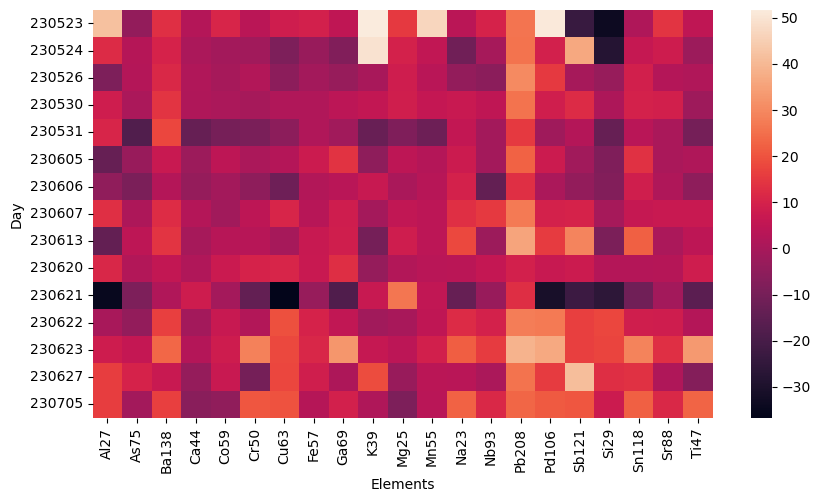

In [101]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(drift_N_pvc)
plt.xlabel('Elements')

plt.gcf().subplots_adjust(bottom=0.2)

#plt.savefig('img/heatmap_drift.png')